# Traffic Signal Recognition
## Aadvanced Machine Learning - Fall 2021
#### Brent Hensley, Dipali Pandey, Mahika Bansal, Sahil Natu, Sahitya Vijayanagar

### Install Libraries

In [ ]:
#pip install tensorflow keras sklearn matplotlib pandas opencv-python pillow

### Import Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score

### Reading Image Data

#### Dataset 1 - 43 features

In [16]:
data_1 = []
labels_1 = []
classes_1 = 43
cur_path_1 = os.getcwd()
print(cur_path_1)

for i in range(classes_1):
    path = os.path.join(cur_path_1,'data','Train',str(i))
    images = os.listdir(path)
    
    for img in images:
        if img.split('.')[1] in ['png','jpeg','jpg']:
            try:
                image = Image.open(path+'/'+img)
                image = image.resize((30,30))
                image = np.array(image)
                data_1.append(image)
                labels_1.append(i)
            except:
                print('Error loading image {0} from class {1}'.format(img,i))

data_1 = np.array(data_1)
labels_1 = np.array(labels_1)

test_classes_1 = pd.read_csv(r'data/Test.csv')['ClassId']
test_data_1 = []

path = os.path.join(cur_path_1,'data','Test')
images = os.listdir(path)
    
for img in images:
    if img.split('.')[1] in ['png','jpeg','jpg']:
        try:
            image = Image.open(path+'/'+img)
            image = image.resize((30,30))
            image = np.array(image)
            test_data_1.append(image)
        except:
            print('Error loading image {0}'.format(img))
test_data_1 = np.array(test_data_1)
test_classes_1 = np.array(test_classes_1)

C:\Users\sahil\Google Drive\UT Austin\College\Fall\Adv ML\Project


#### Dataset 2 - 62 features

In [21]:
data_2 = []
labels_2 = []
classes_2 = 62
cur_path_2 = os.getcwd()
print(cur_path_2)

for i in range(classes_2):
    path = os.path.join(cur_path_2,'data2','Training',str(i).rjust(5,'0'))
    images = os.listdir(path)
    
    for img in images:
        if img.split('.')[1] in ['png','jpeg','jpg','ppm']:
            try:
                image = Image.open(path+'\\'+img)
                image = image.resize((30,30))
                image = np.array(image)
                data_2.append(image)
                labels_2.append(i)
            except:
                print('Error loading image {0} from class {1}'.format(img,i))

data_2 = np.array(data_2)
labels_2 = np.array(labels_2)

test_classes_2 = []
test_data_2 = []

for i in range(classes_2):
    path = os.path.join(cur_path_2,'data2','Testing',str(i).rjust(5,'0'))
    images = os.listdir(path)
    
    for img in images:
        if img.split('.')[1] in ['png','jpeg','jpg','ppm']:
            try:
                image = Image.open(path+'\\'+img)
                image = image.resize((30,30))
                image = np.array(image)
                test_data_2.append(image)
                test_classes_2.append(i)
            except:
                print('Error loading image {0} from class {1}'.format(img,i))
test_classes_2 = np.array(test_classes_2)
test_data_2 = np.array(test_data_2)

C:\Users\sahil\Google Drive\UT Austin\College\Fall\Adv ML\Project


### Creating Training and Testing Sets

#### Dataset 1 - 43 features

In [22]:
print("Data and Labels:")
print(data_1.shape, labels_1.shape)

# Splitting training and testing dataset
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_1, labels_1, test_size=0.2, random_state=1)
print("Training Data, Testing Data, Training Labels, Testing Labels:")
print(X_train_1.shape, X_test_1.shape, y_train_1.shape, y_test_1.shape)

# Transforming labels with one-hot encoding
y_train_1 = to_categorical(y_train_1, 43)
y_test_1 = to_categorical(y_test_1, 43)

Data and Labels:
(39209, 30, 30, 3) (39209,)
Training Data, Testing Data, Training Labels, Testing Labels:
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


#### Dataset 2 - 62 features

In [23]:
print("Data and Labels:")
print(data_2.shape, labels_2.shape)

# Splitting training and testing dataset
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_2, labels_2, test_size=0.2, random_state=1)
print("Training Data, Testing Data, Training Labels, Testing Labels:")
print(X_train_2.shape, X_test_2.shape, y_train_2.shape, y_test_2.shape)

# Transforming labels with one-hot encoding
y_train_2 = to_categorical(y_train_2, 62)
y_test_2 = to_categorical(y_test_2, 62)

Data and Labels:
(4575, 30, 30, 3) (4575,)
Training Data, Testing Data, Training Labels, Testing Labels:
(3660, 30, 30, 3) (915, 30, 30, 3) (3660,) (915,)


### Building CNN Models

#### Model 1 | 43 Features | 4 Layers

In [24]:
model_1 = Sequential()
model_1.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train_1.shape[1:]))
model_1.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model_1.add(MaxPool2D(pool_size=(2, 2)))
model_1.add(Dropout(rate=0.25))
model_1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_1.add(MaxPool2D(pool_size=(2, 2)))
model_1.add(Dropout(rate=0.25))
model_1.add(Flatten())
model_1.add(Dense(256, activation='relu'))
model_1.add(Dropout(rate=0.5))
model_1.add(Dense(43, activation='softmax'))

model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Model 2 | 43 Features | 3 Layers

In [25]:
model_2 = Sequential()
model_2.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train_1.shape[1:]))
model_2.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model_2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model_2.add(MaxPool2D(pool_size=(2, 2)))
model_2.add(Dropout(rate=0.25))
model_2.add(Flatten())
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(rate=0.5))
model_2.add(Dense(43, activation='softmax'))

model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Model 3 | 43 Features | 2 Layers

In [26]:
model_3 = Sequential()
model_3.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', input_shape=X_train_1.shape[1:]))
model_3.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model_3.add(MaxPool2D(pool_size=(2, 2)))
model_3.add(Dropout(rate=0.25))
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(rate=0.5))
model_3.add(Dense(43, activation='softmax'))

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Model 4 | 62 Features | 4 Layers

In [27]:
model_4 = Sequential()
model_4.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train_2.shape[1:]))
model_4.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model_4.add(MaxPool2D(pool_size=(2, 2)))
model_4.add(Dropout(rate=0.25))
model_4.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_4.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_4.add(MaxPool2D(pool_size=(2, 2)))
model_4.add(Dropout(rate=0.25))
model_4.add(Flatten())
model_4.add(Dense(256, activation='relu'))
model_4.add(Dropout(rate=0.5))
model_4.add(Dense(62, activation='softmax'))

model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Model 5 | 62 Features | 3 Layers

In [28]:
model_5 = Sequential()
model_5.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train_2.shape[1:]))
model_5.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model_5.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model_5.add(MaxPool2D(pool_size=(2, 2)))
model_5.add(Dropout(rate=0.25))
model_5.add(Flatten())
model_5.add(Dense(256, activation='relu'))
model_5.add(Dropout(rate=0.5))
model_5.add(Dense(62, activation='softmax'))

model_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Model 6 | 62 Features | 2 Layers

In [29]:
model_6 = Sequential()
model_6.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', input_shape=X_train_2.shape[1:]))
model_6.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model_6.add(MaxPool2D(pool_size=(2, 2)))
model_6.add(Dropout(rate=0.25))
model_6.add(Flatten())
model_6.add(Dense(256, activation='relu'))
model_6.add(Dropout(rate=0.5))
model_6.add(Dense(62, activation='softmax'))

model_6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training CNN Models and Validation

In [35]:
epochs = 15

def train_cnn_model(model, model_name, X_train, y_train, batch_size, epochs, X_test, y_test):
    model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))
    model.save(model_name)
    return model

history_1 = train_cnn_model(model_1, "model_1.h5", X_train_1, y_train_1, 32, epochs, X_test_1, y_test_1)
history_2 = train_cnn_model(model_2, "model_2.h5", X_train_1, y_train_1, 32, epochs, X_test_1, y_test_1)
history_3 = train_cnn_model(model_3, "model_3.h5", X_train_1, y_train_1, 32, epochs, X_test_1, y_test_1)
#history_4 = train_cnn_model(model_4, "model_4.h5", X_train_2, y_train_2, 32, epochs, X_test_2, y_test_2)
#history_5 = train_cnn_model(model_5, "model_5.h5", X_train_2, y_train_2, 32, epochs, X_test_2, y_test_2)
#history_6 = train_cnn_model(model_6, "model_6.h5", X_train_2, y_train_2, 32, epochs, X_test_2, y_test_2)

Epoch 1/15
981/981 [==============================] - 45s 45ms/step - loss: 2.0920 - accuracy: 0.4493 - val_loss: 0.8078 - val_accuracy: 0.8131
Epoch 2/15
981/981 [==============================] - 43s 44ms/step - loss: 0.9635 - accuracy: 0.7148 - val_loss: 0.3703 - val_accuracy: 0.8939
Epoch 3/15
981/981 [==============================] - 47s 48ms/step - loss: 0.6402 - accuracy: 0.8058 - val_loss: 0.2747 - val_accuracy: 0.9288
Epoch 4/15
981/981 [==============================] - 56s 57ms/step - loss: 0.4657 - accuracy: 0.8602 - val_loss: 0.1431 - val_accuracy: 0.9580
Epoch 5/15
981/981 [==============================] - 47s 48ms/step - loss: 0.3982 - accuracy: 0.8832 - val_loss: 0.1395 - val_accuracy: 0.9615
Epoch 6/15
981/981 [==============================] - 50s 51ms/step - loss: 0.3379 - accuracy: 0.9030 - val_loss: 0.1482 - val_accuracy: 0.9498
Epoch 7/15
981/981 [==============================] - 47s 48ms/step - loss: 0.3160 - accuracy: 0.9074 - val_loss: 0.1176 - val_accuracy:

### Accuracy and Loss graphs by Epoch for CNN Models

In [36]:
def plot_accuracy(history):
    plt.figure(0)
    plt.plot(history.history['accuracy'], label='training accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()
def plot_loss(history):
    plt.figure(1)
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

Model 1 | 43 Features | 4 Layers


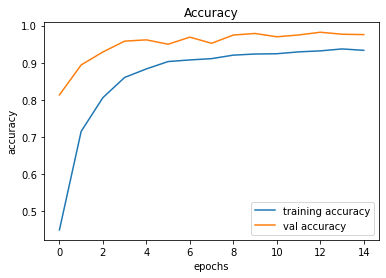

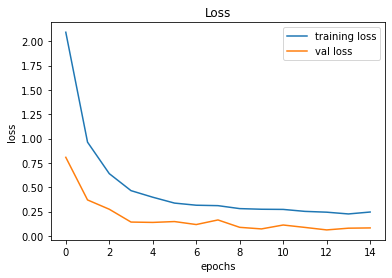

Model 2 | 43 Features | 3 Layers


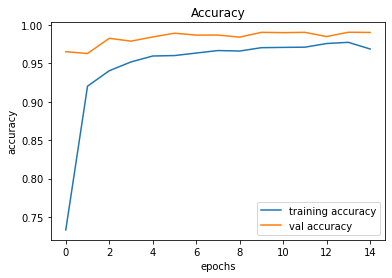

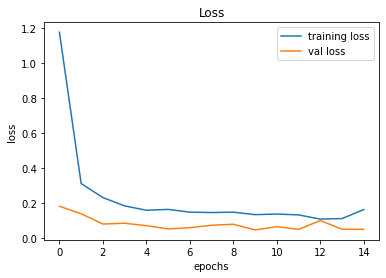

Model 3 | 43 Features | 2 Layers


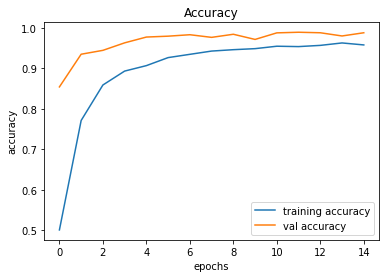

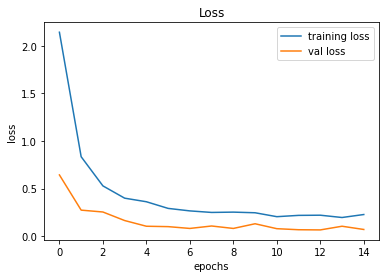

Model 4 | 62 Features | 4 Layers


KeyError: 'accuracy'

<Figure size 432x288 with 0 Axes>

In [37]:
print("Model 1 | 43 Features | 4 Layers")
plot_accuracy(history_1.history)
plot_loss(history_1.history)
print("Model 2 | 43 Features | 3 Layers")
plot_accuracy(history_2.history)
plot_loss(history_2.history)
print("Model 3 | 43 Features | 2 Layers")
plot_accuracy(history_3.history)
plot_loss(history_3.history)
print("Model 4 | 62 Features | 4 Layers")
plot_accuracy(history_4.history)
plot_loss(history_4.history)
print("Model 5 | 62 Features | 3 Layers")
plot_accuracy(history_5.history)
plot_loss(history_5.history)
print("Model 6 | 62 Features | 2 Layers")
plot_accuracy(history_6.history)
plot_loss(history_6.history)

### Accuracy of Models on Test Data

In [38]:
def accuracy_scr(model, X_test, y_test):
    pred = model.predict(X_test)
    pred_classes = np.array([np.argmax(x) for x in pred])
    return accuracy_score(y_test, pred_classes)

print("Model 1 | 43 Features | 4 Layers\nAccuracy: {0:.2f}%\n".format(100*accuracy_scr(model_1, test_data_1, test_classes_1)))
print("Model 2 | 43 Features | 3 Layers\nAccuracy: {0:.2f}%\n".format(100*accuracy_scr(model_2, test_data_1, test_classes_1)))
print("Model 3 | 43 Features | 2 Layers\nAccuracy: {0:.2f}%\n".format(100*accuracy_scr(model_3, test_data_1, test_classes_1)))
print("Model 4 | 62 Features | 4 Layers\nAccuracy: {0:.2f}%\n".format(100*accuracy_scr(model_4, test_data_2, test_classes_2)))
print("Model 5 | 62 Features | 3 Layers\nAccuracy: {0:.2f}%\n".format(100*accuracy_scr(model_5, test_data_2, test_classes_2)))
print("Model 6 | 62 Features | 2 Layers\nAccuracy: {0:.2f}%\n".format(100*accuracy_scr(model_6, test_data_2, test_classes_2)))

Model 1 | 43 Features | 4 Layers
Accuracy: 94.68%

Model 2 | 43 Features | 3 Layers
Accuracy: 96.66%

Model 3 | 43 Features | 2 Layers
Accuracy: 94.64%

Model 4 | 62 Features | 4 Layers
Accuracy: 95.20%

Model 5 | 62 Features | 3 Layers
Accuracy: 95.24%

Model 6 | 62 Features | 2 Layers
Accuracy: 94.56%



### Testing on External Data (Images from Google)

### Test 1
##### Models 1, 2, 3 | 43 Features | 4, 3, 2 Layers | 31367 Training Data Points

In [42]:
test_data_1 = []
test_labels_1 = []
test_cur_path_1 = os.getcwd()
print(cur_path_1)

path = os.path.join(cur_path_1,'test_img')
images = os.listdir(path)
for img in images:
    try:
        image = Image.open(path+'/'+img)
        image = image.resize((30,30))
        image = np.array(image)
        test_data_1.append(image)
        test_labels_1.append(img.split('_')[0])
    except:
        print('Error loading image')

test_data_1 = np.array(test_data_1)
test_labels_1 = np.array(test_labels_1).astype(np.int)

pred_test_11 = model_1.predict(test_data_1)
pred_classes_test_11 = np.array([np.argmax(x) for x in pred_test_11])

print("4-layer Model")
print("Actual Labels:")
print(test_labels_1)
print("Predicted Labels:")
print(pred_classes_test_11)
print("Accuracy:")
print(accuracy_score(test_labels_1, pred_classes_test_11))

pred_test_12 = model_2.predict(test_data_1)
pred_classes_test_12 = np.array([np.argmax(x) for x in pred_test_12])

print("\n3-layer Model")
print("Actual Labels:")
print(test_labels_1)
print("Predicted Labels:")
print(pred_classes_test_12)
print("Accuracy:")
print(accuracy_score(test_labels_1, pred_classes_test_12))

pred_test_13 = model_3.predict(test_data_1)
pred_classes_test_13 = np.array([np.argmax(x) for x in pred_test_13])

print("\n2-layer Model")
print("Actual Labels:")
print(test_labels_1)
print("Predicted Labels:")
print(pred_classes_test_13)
print("Accuracy:")
print(accuracy_score(test_labels_1, pred_classes_test_13))

C:\Users\sahil\Google Drive\UT Austin\College\Fall\Adv ML\Project
Error loading image
Error loading image
4-layer Model
Actual Labels:
[14 14 14 17 25 26]
Predicted Labels:
[17 14 13 12 12 17]
Accuracy:
0.16666666666666666

3-layer Model
Actual Labels:
[14 14 14 17 25 26]
Predicted Labels:
[13 14 13 17 18 18]
Accuracy:
0.3333333333333333

2-layer Model
Actual Labels:
[14 14 14 17 25 26]
Predicted Labels:
[12 14 12 25 18  1]
Accuracy:
0.16666666666666666


<ipython-input-42-d499e8cc8614>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_labels_1 = np.array(test_labels_1).astype(np.int)


### Test 2
##### Models 4, 5, 6 | 62 Features | 4, 3, 2 Layers | 3660 Training Data Points

In [43]:
test_data_2 = []
test_labels_2 = []
test_cur_path_2 = os.getcwd()
print(cur_path_2)

path = os.path.join(cur_path_2,'test_img_2')
images = os.listdir(path)
for img in images:
    try:
        image = Image.open(path+'/'+img)
        image = image.resize((30,30))
        image = np.array(image)
        test_data_2.append(image)
        test_labels_2.append(img.split('_')[0])
    except:
        print('Error loading image')

test_data_2 = np.array(test_data_2)
test_labels_2 = np.array(test_labels_2).astype(np.int)

pred_test_21 = model_4.predict(test_data_2)
pred_classes_test_21 = np.array([np.argmax(x) for x in pred_test_21])

print("4-layer Model:")
print("Actual Labels:")
print(test_labels_2)
print("Predicted Labels:")
print(pred_classes_test_21)
print("Accuracy:")
print(accuracy_score(test_labels_2, pred_classes_test_21))

pred_test_22 = model_5.predict(test_data_2)
pred_classes_test_22 = np.array([np.argmax(x) for x in pred_test_22])

print("\n3-layer Model:")
print("Actual Labels:")
print(test_labels_2)
print("Predicted Labels:")
print(pred_classes_test_22)
print("Accuracy:")
print(accuracy_score(test_labels_2, pred_classes_test_22))

pred_test_23 = model_6.predict(test_data_2)
pred_classes_test_23 = np.array([np.argmax(x) for x in pred_test_23])

print("\n2-layer Model:")
print("Actual Labels:")
print(test_labels_2)
print("Predicted Labels:")
print(pred_classes_test_23)
print("Accuracy:")
print(accuracy_score(test_labels_2, pred_classes_test_23))

C:\Users\sahil\Google Drive\UT Austin\College\Fall\Adv ML\Project
Error loading image
4-layer Model:
Actual Labels:
[10 11 21 21 21 22]
Predicted Labels:
[10 37 61 21 22  1]
Accuracy:
0.3333333333333333

3-layer Model:
Actual Labels:
[10 11 21 21 21 22]
Predicted Labels:
[61  9 10 21 61 21]
Accuracy:
0.16666666666666666

2-layer Model:
Actual Labels:
[10 11 21 21 21 22]
Predicted Labels:
[17 17 61 22 61 61]
Accuracy:
0.0


<ipython-input-43-6481bb85deff>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_labels_2 = np.array(test_labels_2).astype(np.int)
